In [1]:
from ast import literal_eval
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import patches
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sys

# import utils
sys.path.append("../")

from data_loading import *
from isoform_pairwise_metrics import *
from plotting import y1h_pdi_per_tf_gene_plot, m1h_activation_per_tf_gene_plot, COLOR_PURPLE
from data_loading import load_annotated_6k_collection, load_y1h_pdi_data

In [2]:
tfs = load_annotated_6k_collection()

reading from cache


In [3]:
y1h_baits_f = "../../data/internal/Y1H_DNA_baits.fa"

## 1. import baits and y1h results

In [4]:
ids = []
seqs = []

for record in SeqIO.parse(y1h_baits_f, "fasta"):
    ids.append(record.description)
    seqs.append(str(record.seq))
    
dna = pd.DataFrame()
dna["id"] = ids
dna["seq"] = seqs
dna["seq_len"] = dna.seq.str.len()
dna["id_upper"] = dna["id"].str.upper()
dna

,id,seq,seq_len,id_upper
0,hs1006,TAGTGGTGAACAACCACCATTGCTGCATCACGGAGTTTAAGTTCTC...,1493,HS1006
1,hs101,CCTCATACCTCCAAAGCCTCCAAGGCATTCCATGGAGCCATAATTG...,1329,HS101
2,hs1022,CAAAGCTGGCTAAAACCATGTCTGGAAAGCTGACAAATTTCCAGGT...,1378,HS1022
3,hs1030,GCAGAATTGCAACAAGAATTTCTTCTGTATTATTTTTTCATAGATA...,1436,HS1030
4,hs1043,GAAGACCAGAAAACCAGAAAGGCGAGGAGCGGCGGACGCTGACCCT...,1191,HS1043
...,...,...,...,...
454,MUT_91,GGAACATAGTTGGATGAGGAATTAATTAGATGGAAGGGAGATTTTG...,61,MUT_91
455,MUT_92,ACCCTCTGTAAACACTCAATGTGTTCTCACCTTGTTATCATTCCCA...,61,MUT_92
456,MUT_93,CTACTGAGCCATGAAAAAGAACAAGCCAAATGGATGGTCCAAAATG...,61,MUT_93
457,MUT_98,CCTTGAGGATGAAAGACAGGTACAGAGGCATGAATGCTTGTACCTG...,61,MUT_98


In [5]:
y1h = load_y1h_pdi_data(add_missing_data=True)
y1h

,tf,unique_acc,HS1006,HS1022,HS1043,HS1067,HS1139,HS1142,HS118,HS1181,...,KITLG,LTA,PF4V1,TNFSF10,TNFSF13,TNFSF14,TNFSF4,TNFSF8,XCL1,XCL2
183,AEBP2,AEBP2|2/3|05F03,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
184,AEBP2,AEBP2|3/3|05E07,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
185,ARNT2,ARNT2|1/6|08C12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
186,ARNT2,ARNT2|2/6|09E01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
187,ARNT2,ARNT2|3/6|10D11,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,ZSCAN32,ZSCAN32|1/5|05B06,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
758,ZSCAN32,ZSCAN32|2/5|05F05,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
759,ZSCAN32,ZSCAN32|4/5|05H04,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
760,ZSCAN9,ZSCAN9|1/3|11H08,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## CREB1

In [6]:
kfit_dat = pd.read_table("../../data/processed/pbms/CREB1kfit_dat.csv", sep=",")
da_dat = pd.read_table("../../data/processed/pbms/CREB1da_dat.csv", sep=",")

In [7]:
kfit_ref = kfit_dat[kfit_dat["cname"] == "CREB1-ref"]
kfit_alt = kfit_dat[kfit_dat["cname"] == "CREB1-alt"]

In [8]:
kfit_vs = kfit_ref.merge(kfit_alt, on=["seq"], suffixes=("_ref", "_alt"))

In [9]:
da_alt = da_dat[da_dat["cname"] == "CREB1-alt"]

In [10]:
kfit_vs = kfit_vs.merge(da_alt[["seq", "contrastQ", "contrastQ_cut", "contrastAverage", "contrastDifference"]], on="seq")

In [11]:
kfit_vs.contains_any_motif_ref.value_counts()

*other k-mer    32640
CREB1 k-mer       256
Name: contains_any_motif_ref, dtype: int64

In [12]:
kfit_vs.affinityEstimate_ref.max()

11.507647689855302

In [13]:
creb1_y1h = (y1h.loc[y1h["tf"] == "CREB1", y1h.columns[1:]].copy().set_index("unique_acc"))
creb1_y1h = creb1_y1h.loc[:, creb1_y1h.any(axis=0)]
creb1_y1h

,HS697,MUT_156,MUT_158,MUT_162
unique_acc,,,,
CREB1|1/2|02E01,False,False,False,False
CREB1|2/2|01F12,True,True,True,True


In [14]:
creb1_baits = list(creb1_y1h.columns)
creb1_baits = dna[dna["id_upper"].isin(creb1_baits)]
creb1_baits

,id,seq,seq_len,id_upper
195,hs697,CATTAGGAGAGGACTCTGTCTATATTTTTAATTTTAGCTTAAAACC...,1142,HS697
286,MUT_156,GCTCCGTCTCCACAGCCCTGGCCCAGCAGCCTCTTATAAGCTGAGC...,61,MUT_156
288,MUT_158,GGGCTCCGTCTCCACAGCCCTGGCCCAGCAGCCTCTTATAAGCTGA...,61,MUT_158
293,MUT_162,ATTTTTTACATATGCCTCCTCGTTTTGTGAATTTTGAAAGGATGTG...,61,MUT_162


In [15]:
kfit_vs.columns

Index(['seq', 'cname_ref', 'affinityEstimate_ref', 'affinityVariance_ref',
       'contrastDifference_ref', 'contrastAverage_ref', 'contrastVariance_ref',
       'contains_motif_ref', 'contains_rc_motif_ref', 'contains_any_motif_ref',
       'cname_alt', 'affinityEstimate_alt', 'affinityVariance_alt',
       'contrastDifference_alt', 'contrastAverage_alt', 'contrastVariance_alt',
       'contains_motif_alt', 'contains_rc_motif_alt', 'contains_any_motif_alt',
       'contrastQ', 'contrastQ_cut', 'contrastAverage', 'contrastDifference'],
      dtype='object')

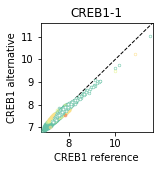

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

markers = [",", "."]
titles = ["CREB1-1"]

for k, motif in enumerate(["*other k-mer", "CREB1 k-mer"]):
    for j, qval in enumerate(["(0.1,1]", "(0.01,0.1]", "(0.001,0.01]", "[0,0.001]"]):

        sub = kfit_vs[(kfit_vs["contrastQ_cut"] == qval) & 
                      (kfit_vs["contains_any_motif_ref"] == motif)]
        xs = sub["affinityEstimate_ref"]
        ys = sub["affinityEstimate_alt"]
        ts = sub["contrastQ"]
        
        color = sns.color_palette("Spectral_r", n_colors=4)[j]
        marker = markers[k]

        if marker == "o":
            ax.scatter(xs, ys, 30, marker=".", edgecolors="black", facecolors=color, alpha=1, linewidth=0.5,
                       zorder=10)
        elif marker == ",":
            ax.scatter(xs, ys, 30, marker=".", edgecolors=color, facecolors=color, alpha=0.5,
                       zorder=10)
        else:
            ax.scatter(xs, ys, 30, marker=marker, edgecolors=color, facecolors='white', alpha=1, linewidth=0.5,
                       zorder=10)

ax.set_xlim((6.8, 11.6))
ax.set_ylim((6.8, 11.6))
ax.plot([6.8, 11.6], [6.8, 11.6], color="black", linestyle="dashed", linewidth=1, zorder=1)
# ax.set_xticks([6, 8, 10, 12])
# ax.set_yticks([6, 8, 10, 12])
ax.set_xlabel("CREB1 reference")
ax.set_ylabel("CREB1 alternative")
ax.set_title("CREB1-1")

# # annotate
# for i, row in creb1_baits.iterrows():
#     ax.annotate(row.id_upper, xy=(row.xval, row.yval),
#                 xytext=(5, -5), textcoords='offset points', arrowprops = dict(arrowstyle="-"),
#                 ha="left", va="top", fontsize=7,
#                 bbox=dict(boxstyle='square,pad=0', fc='none', ec='none'))
    
fig.savefig("../../figures/CREB1_isoforms_pbm_scatter.pdf", dpi="figure", bbox_inches="tight")

In [17]:
# add colors to kfit_vs
cmap_name = "Spectral"
colname = "contrastDifference_alt"

cmap = cm.get_cmap(cmap_name)
norm = mpl.colors.Normalize(vmin=kfit_vs[colname].min(), vmax=kfit_vs[colname].max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)

def get_rgb(row, colname, m):
    x = row[colname]
    rgb = m.to_rgba(x)
    return rgb

kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)
kfit_vs.sample(5)

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_motif_ref,contains_rc_motif_ref,contains_any_motif_ref,...,contrastAverage_alt,contrastVariance_alt,contains_motif_alt,contains_rc_motif_alt,contains_any_motif_alt,contrastQ,contrastQ_cut,contrastAverage,contrastDifference,contrastDifference_alt_rgb
24022,CTGTCACA,CREB1-ref,7.707910,0.002881,NaN,NaN,NaN,False,False,*other k-mer,...,7.725025,0.001480,False,False,*other k-mer,0.930827,"(0.1,1]",7.725025,0.034231,"(0.5803921568627453, 0.8313725490196079, 0.644..."
22313,CGTTAAAG,CREB1-ref,7.519890,0.005933,NaN,NaN,NaN,False,False,*other k-mer,...,7.527429,0.001563,False,False,*other k-mer,0.984506,"(0.1,1]",7.527429,0.015078,"(0.6334486735870821, 0.8521337946943485, 0.643..."
5323,ACCCGGGC,CREB1-ref,7.144446,0.005192,NaN,NaN,NaN,False,False,*other k-mer,...,7.118666,0.001540,False,False,*other k-mer,0.862998,"(0.1,1]",7.118666,-0.051559,"(0.8202998846597465, 0.9275663206459055, 0.612..."
18647,CCCTGGTC,CREB1-ref,7.142867,0.006823,NaN,NaN,NaN,False,False,*other k-mer,...,7.103315,0.001587,False,False,*other k-mer,0.686119,"(0.1,1]",7.103315,-0.079104,"(0.8928873510188392, 0.9570934256055365, 0.597..."
6335,ACGGAACA,CREB1-ref,7.428738,0.006264,NaN,NaN,NaN,False,False,*other k-mer,...,7.430474,0.001422,False,False,*other k-mer,0.995922,"(0.1,1]",7.430474,0.003471,"(0.6751249519415612, 0.8685121107266437, 0.642..."


In [18]:
def vals_per_bait(row, kfit_vs, colname, alt_suffix, ascending):
    
    kmers = []
    seq = row.seq
    seq_len = row.seq_len
    for i in range(0, seq_len-8):
        kmer = seq[i:i+8]
        kmers.append(kmer)
        
    sub = kfit_vs[kfit_vs["seq"].isin(kmers)]
    sub["abs"] = np.abs(sub[colname])
    sub = sub.sort_values(by="abs", ascending=ascending)
    largest_kmer = sub["seq"].iloc[0]
    largest_val = sub[colname].iloc[0]
    xval = sub["affinityEstimate_ref"].iloc[0]
    yval = sub["affinityEstimate_%s" % alt_suffix].iloc[0]
    
    rgb = sub["%s_rgb" % colname].iloc[0]
    return "%s_%s_%s_%s_%s" % (largest_kmer, largest_val, xval, yval, rgb)

In [19]:
creb1_baits["tmp"] = creb1_baits.apply(vals_per_bait, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_alt", alt_suffix="alt",
                                       ascending=False)
creb1_baits["val_kmer"] = creb1_baits["tmp"].str.split("_", expand=True)[0].astype(str)
creb1_baits["val_diff"] = creb1_baits["tmp"].str.split("_", expand=True)[1].astype(float)
creb1_baits["xval"] = creb1_baits["tmp"].str.split("_", expand=True)[2].astype(float)
creb1_baits["yval"] = creb1_baits["tmp"].str.split("_", expand=True)[3].astype(float)
creb1_baits["rgb"] = creb1_baits["tmp"].str.split("_", expand=True)[4].astype(str)
creb1_baits["rgb"] = creb1_baits["rgb"].apply(literal_eval)
creb1_baits

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

,id,seq,seq_len,id_upper,tmp,val_kmer,val_diff,xval,yval,rgb
195,hs697,CATTAGGAGAGGACTCTGTCTATATTTTTAATTTTAGCTTAAAACC...,1142,HS697,AATAATTA_-0.256643395741017_8.01488613473334_7...,AATAATTA,-0.256643,8.014886,7.758243,"(0.9962322183775472, 0.88319876970396, 0.55309..."
286,MUT_156,GCTCCGTCTCCACAGCCCTGGCCCAGCAGCCTCTTATAAGCTGAGC...,61,MUT_156,TGACGTCA_-0.476488499421089_11.507647689855302...,TGACGTCA,-0.476488,11.507648,11.031159,"(0.8996539792387543, 0.340715109573241, 0.2848..."
288,MUT_158,GGGCTCCGTCTCCACAGCCCTGGCCCAGCAGCCTCTTATAAGCTGA...,61,MUT_158,TGACGTCA_-0.476488499421089_11.507647689855302...,TGACGTCA,-0.476488,11.507648,11.031159,"(0.8996539792387543, 0.340715109573241, 0.2848..."
293,MUT_162,ATTTTTTACATATGCCTCCTCGTTTTGTGAATTTTGAAAGGATGTG...,61,MUT_162,ATTTTGAA_0.0917191558815862_7.4191645160819695...,ATTTTGAA,0.091719,7.419165,7.510884,"(0.4, 0.7607843137254902, 0.6470588235294118, ..."


In [20]:
colors = creb1_baits[["id_upper", "rgb"]].set_index("id_upper").T
colors.index = ["CREB1-1"]
colors.loc["CREB1-2"] = [(0, 0, 0, 1)] * len(creb1_baits)
colors = colors.loc[["CREB1-2", "CREB1-1"]]
colors

id_upper,HS697,MUT_156,MUT_158,MUT_162
CREB1-2,"(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)"
CREB1-1,"(0.9962322183775472, 0.88319876970396, 0.55309...","(0.8996539792387543, 0.340715109573241, 0.2848...","(0.8996539792387543, 0.340715109573241, 0.2848...","(0.4, 0.7607843137254902, 0.6470588235294118, ..."


In [21]:
annot = creb1_baits[["id_upper", "val_diff"]].set_index("id_upper").T
annot.index = ["CREB1-1"]
annot.loc["CREB1-2"] = ["NA"] * len(creb1_baits)
annot = annot.loc[["CREB1-2", "CREB1-1"]]
annot

id_upper,HS697,MUT_156,MUT_158,MUT_162
CREB1-2,NA,NA,NA,NA
CREB1-1,-0.256643,-0.476488,-0.476488,0.0917192


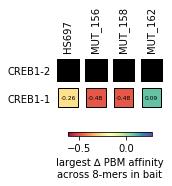

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2.5))
y1h_pdi_per_tf_gene_plot("CREB1", data=y1h, ax=ax, 
                         iso_order=["CREB1-2", "CREB1-1"], bait_colors=colors, bait_annot=annot)

plt.colorbar(m, ax=ax, orientation="horizontal", shrink=0.75, label="largest ∆ PBM affinity\nacross 8-mers in bait")
plt.savefig('../../figures/CREB1_y1h_with_pbm.pdf', bbox_inches='tight', dpi="figure")

In [23]:
def y1h_pdi_per_tf_gene_plot(
    gene_name, data, ax=None, min_n_isoforms=1, min_n_partners=1, iso_order=None, bait_colors=None, bait_annot=None,
):
    tf = (
        data.loc[data["tf"] == gene_name, data.columns[1:]]
        .copy()
        .set_index("unique_acc")
    )
    tf.index = tf.index.map(isoform_display_name)
    tf = tf.loc[:, tf.any(axis=0)]
    if ax is None:
        ax = plt.gca()
    if tf.shape[0] < min_n_isoforms or tf.shape[1] < min_n_partners:
        ax.set_axis_off()
        ax.text(
            0.5,
            0.5,
            "No PDI data available",
            ha="center",
            va="center",
            fontsize=30,
            fontweight="bold",
            color="grey",
        )
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        return
    if iso_order is None:
        tf = tf
    else:
        tf = tf.loc[iso_order, :]
    binary_profile_matrix(tf, ax=ax, column_label_rotation=90, bait_colors=bait_colors, bait_annot=bait_annot)
    ax.set_yticklabels(
        [
            strikethrough(name) if all_na else name
            for name, all_na in tf.isnull().all(axis=1).items()
        ]
    )

## TBX5

In [24]:
kfit_dat = pd.read_table("../../data/processed/pbms/TBX5kfit_dat.csv", sep=",")
da_dat = pd.read_table("../../data/processed/pbms/TBX5da_dat.csv", sep=",")

In [25]:
kfit_ref = kfit_dat[kfit_dat["cname"] == "TBX5C05-REF"]
kfit_3 = kfit_dat[kfit_dat["cname"] == "TBX5A05"]
kfit_2 = kfit_dat[kfit_dat["cname"] == "TBX5B05"]

In [26]:
kfit_vs = kfit_ref.merge(kfit_2, on=["seq"], suffixes=("_ref", ""))
kfit_vs = kfit_vs.merge(kfit_3, on=["seq"], suffixes=("_iso2", "_iso3"))
kfit_vs.head()

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_any_motif_ref,cname_iso2,affinityEstimate_iso2,...,contrastAverage_iso2,contrastVariance_iso2,contains_any_motif_iso2,cname_iso3,affinityEstimate_iso3,affinityVariance_iso3,contrastDifference_iso3,contrastAverage_iso3,contrastVariance_iso3,contains_any_motif_iso3
0,AAAAAAAA,TBX5C05-REF,10.028611,0.004803,NaN,NaN,NaN,other k-mer,TBX5B05,9.903240,...,9.965926,0.003227,other k-mer,TBX5A05,9.931881,0.003412,-0.096730,9.980246,0.003536,other k-mer
1,AAAAAAAC,TBX5C05-REF,9.956585,0.001912,NaN,NaN,NaN,other k-mer,TBX5B05,9.934673,...,9.945629,0.005728,other k-mer,TBX5A05,9.957827,0.003953,0.001242,9.957206,0.003823,other k-mer
2,AAAAAAAG,TBX5C05-REF,10.115281,0.008088,NaN,NaN,NaN,other k-mer,TBX5B05,10.040526,...,10.077904,0.004583,other k-mer,TBX5A05,9.936246,0.004633,-0.179034,10.025764,0.005549,other k-mer
3,AAAAAAAT,TBX5C05-REF,10.020661,0.004480,NaN,NaN,NaN,other k-mer,TBX5B05,9.994817,...,10.007739,0.003959,other k-mer,TBX5A05,9.973363,0.002724,-0.047297,9.997012,0.004635,other k-mer
4,AAAAAACA,TBX5C05-REF,10.005205,0.005584,NaN,NaN,NaN,other k-mer,TBX5B05,9.981221,...,9.993213,0.004405,other k-mer,TBX5A05,9.912703,0.003827,-0.092501,9.958954,0.004838,other k-mer


In [27]:
da_3 = da_dat[da_dat["cname"] == "TBX5A05"]
da_2 = da_dat[da_dat["cname"] == "TBX5B05"]

In [28]:
kfit_vs = kfit_vs.merge(da_2[["seq", "contrastQ", "contrastQ_cut"]], on="seq")
kfit_vs = kfit_vs.merge(da_3[["seq", "contrastQ", "contrastQ_cut"]], on="seq", suffixes=("_iso2", "_iso3"))

In [29]:
kfit_vs.contains_any_motif_ref.value_counts()

other k-mer     32848
* TBX5 k-mer       48
Name: contains_any_motif_ref, dtype: int64

In [30]:
kfit_vs.affinityEstimate_iso3.min()

9.46804367678806

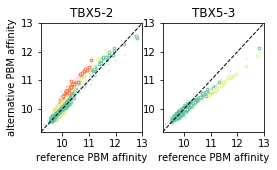

In [31]:
fig, axarr = plt.subplots(1, 2, figsize=(4, 2))

markers = [",", ".", "o"]
titles = ["TBX5-2", "TBX5-3"]

for i, suffix in enumerate(["iso2", "iso3"]):
    
    ax = axarr[i]

    for k, motif in enumerate(["other k-mer", "* TBX5 k-mer", "* ACGTGT k-mer"]):
        for j, qval in enumerate(["(0.1,1]", "(0.01,0.1]", "(0.001,0.01]", "[0,0.001]"]):
            
            sub = kfit_vs[(kfit_vs["contrastQ_cut_%s" % suffix] == qval) & 
                          (kfit_vs["contains_any_motif_ref"] == motif)]
            xs = sub["affinityEstimate_ref"]
            ys = sub["affinityEstimate_%s" % suffix]
            
            color = sns.color_palette("Spectral_r", n_colors=4)[j]
            marker = markers[k]
            
            if marker == "o":
                ax.scatter(xs, ys, 15, marker=marker, edgecolors="black", facecolors=color, alpha=1, linewidth=0.5)
            elif marker == ",":
                ax.scatter(xs, ys, 1, marker=".", edgecolors=color, facecolors='none', alpha=0.5)
            else:
                ax.scatter(xs, ys, 30, marker=marker, edgecolors=color, facecolors='white', alpha=1)
                
    
    ax.set_xlim((9.2, 13))
    ax.set_ylim((9.2, 13))
    ax.plot([9.2, 13], [9.2, 13], color="black", linestyle="dashed", linewidth=1, zorder=1)
    ax.set_xticks([10, 11, 12, 13])
    ax.set_yticks([10, 11, 12, 13])
    ax.set_xlabel("reference PBM affinity")
    ax.set_title(titles[i])
    
axarr[0].set_ylabel("alternative PBM affinity")
fig.savefig("../../figures/TBX5_isoforms_pbm_scatter.pdf", dpi="figure", bbox_inches="tight")

In [32]:
# add colors to kfit_vs
cmap_name = "Spectral"
colname = "contrastDifference_iso2"

cmap = cm.get_cmap(cmap_name)
norm = mpl.colors.Normalize(vmin=kfit_vs[colname].min(), vmax=kfit_vs[colname].max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)

kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)
kfit_vs.sample(5)

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_any_motif_ref,cname_iso2,affinityEstimate_iso2,...,affinityVariance_iso3,contrastDifference_iso3,contrastAverage_iso3,contrastVariance_iso3,contains_any_motif_iso3,contrastQ_iso2,contrastQ_cut_iso2,contrastQ_iso3,contrastQ_cut_iso3,contrastDifference_iso2_rgb
29455,GGTCGACC,TBX5C05-REF,9.620299,0.012669,NaN,NaN,NaN,other k-mer,TBX5B05,9.517777,...,0.007255,-0.078615,9.580992,0.009948,other k-mer,0.771541,"(0.1,1]",0.778551,"(0.1,1]","(0.994079200307574, 0.778469819300269, 0.46113..."
16504,CAGTCGTC,TBX5C05-REF,9.710430,0.003942,NaN,NaN,NaN,other k-mer,TBX5B05,9.736696,...,0.003772,0.007209,9.714034,0.003271,other k-mer,0.907335,"(0.1,1]",0.971184,"(0.1,1]","(0.9985390234525182, 0.9547097270280661, 0.673..."
32755,TGTTGTAA,TBX5C05-REF,10.124392,0.006161,NaN,NaN,NaN,other k-mer,TBX5B05,10.251561,...,0.004190,-0.098158,10.075313,0.004712,other k-mer,0.497077,"(0.1,1]",0.600527,"(0.1,1]","(0.9519415609381008, 0.9807766243752404, 0.674..."
12179,ATCATTAC,TBX5C05-REF,10.037281,0.005896,NaN,NaN,NaN,other k-mer,TBX5B05,10.232369,...,0.003418,-0.092693,9.990935,0.004877,other k-mer,0.100113,"(0.1,1]",0.625391,"(0.1,1]","(0.8838139177239526, 0.9534025374855826, 0.599..."
15134,CACAAACC,TBX5C05-REF,9.947508,0.007297,NaN,NaN,NaN,other k-mer,TBX5B05,9.902250,...,0.004937,-0.053026,9.920995,0.004158,other k-mer,0.837611,"(0.1,1]",0.766315,"(0.1,1]","(0.996078431372549, 0.8784313725490196, 0.5450..."


In [33]:
kfit_vs[["contrastDifference_iso2", "contrastDifference_iso3"]].min().min()

-0.881097456327234

In [34]:
# add colors to kfit_vs
cmap_name = "Spectral"

cmap = cm.get_cmap(cmap_name)
norm = mpl.colors.Normalize(vmin=kfit_vs[["contrastDifference_iso2", "contrastDifference_iso3"]].min().min(), 
                            vmax=kfit_vs[["contrastDifference_iso2", "contrastDifference_iso3"]].max().max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)

colname = "contrastDifference_iso2"
kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)

colname = "contrastDifference_iso3"
kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)
kfit_vs.sample(5)

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_any_motif_ref,cname_iso2,affinityEstimate_iso2,...,contrastDifference_iso3,contrastAverage_iso3,contrastVariance_iso3,contains_any_motif_iso3,contrastQ_iso2,contrastQ_cut_iso2,contrastQ_iso3,contrastQ_cut_iso3,contrastDifference_iso2_rgb,contrastDifference_iso3_rgb
2468,AAGCTATG,TBX5C05-REF,10.034041,0.003042,NaN,NaN,NaN,other k-mer,TBX5B05,9.966517,...,-0.109938,9.979072,0.003481,other k-mer,0.692280,"(0.1,1]",0.512762,"(0.1,1]","(0.9711649365628605, 0.9884659746251442, 0.704...","(0.998077662437524, 0.9992310649750096, 0.7460..."
4063,ACAACCTA,TBX5C05-REF,9.943926,0.003234,NaN,NaN,NaN,other k-mer,TBX5B05,9.918606,...,-0.012768,9.937541,0.003170,other k-mer,0.914235,"(0.1,1]",0.944677,"(0.1,1]","(0.944252210688197, 0.9777008842752788, 0.6620...","(0.9365628604382931, 0.9746251441753172, 0.650..."
16473,CAGTCAAG,TBX5C05-REF,9.901747,0.003842,NaN,NaN,NaN,other k-mer,TBX5B05,9.768366,...,-0.061410,9.871042,0.003640,other k-mer,0.288329,"(0.1,1]",0.708640,"(0.1,1]","(0.9994617454825068, 0.9833141099577085, 0.721...","(0.9673202614379085, 0.9869281045751634, 0.698..."
26770,GCACTATA,TBX5C05-REF,10.015506,0.002674,NaN,NaN,NaN,other k-mer,TBX5B05,9.995795,...,-0.092697,9.969157,0.003822,other k-mer,0.939235,"(0.1,1]",0.584532,"(0.1,1]","(0.940407535563245, 0.976163014225298, 0.65605...","(0.9865436370626682, 0.9946174548250672, 0.728..."
15088,CAATTACG,TBX5C05-REF,10.011590,0.004151,NaN,NaN,NaN,other k-mer,TBX5B05,10.048031,...,-0.090497,9.966342,0.003337,other k-mer,0.867761,"(0.1,1]",0.568625,"(0.1,1]","(0.9058054594386775, 0.9623221837754711, 0.602...","(0.9865436370626682, 0.9946174548250672, 0.728..."


In [35]:
tbx5_y1h = (y1h.loc[y1h["tf"] == "TBX5", y1h.columns[1:]].copy().set_index("unique_acc"))
tbx5_y1h = tbx5_y1h.loc[:, tbx5_y1h.any(axis=0)]
tbx5_y1h

,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
unique_acc,,,,,,,,,,,,,
TBX5|1/3|08E01,True,True,True,True,True,True,True,True,True,True,True,True,True
TBX5|2/3|08C02,True,True,True,True,True,True,True,<NA>,<NA>,<NA>,<NA>,True,<NA>
TBX5|3/3|08H01,True,False,True,False,False,True,True,True,False,False,False,False,True


In [36]:
tbx5_baits = list(tbx5_y1h.columns)
tbx5_baits = dna[dna["id_upper"].isin(tbx5_baits)]
tbx5_baits

,id,seq,seq_len,id_upper
0,hs1006,TAGTGGTGAACAACCACCATTGCTGCATCACGGAGTTTAAGTTCTC...,1493,HS1006
52,hs1516,GAGTAGCAAATGGGGACCAACATGGAATTTGAAATGTATAGGAGGT...,1768,HS1516
68,hs174,GATTTCCTTTGTTGGGCTGAATTTTCAAATCCTTTATGGAGCTGCA...,1466,HS174
82,hs2048,GGGCTGCCTCACTCTGATACCTGGTGTGTGTCCCATTTTGCCTTGG...,1393,HS2048
86,hs2081,TCTGATTTTCTGAGTCACAATGGAAATATTAAGGTGGGTGGTTGTG...,1729,HS2081
138,hs416,ACGCACAGACACCCAATTTCCCATATACAGATAAATGCACACATGT...,556,HS416
183,hs653,GGCAGAGTAGGCTTTCAGAGGTAAGTTTGTGGTTAGTACTTTAGCT...,903,HS653
201,hs721,GAGGGATCTCCTCAAGTGGTTCCTGATGGCGGGAAAATAAAAATGG...,974,HS721
202,hs722,CAAGTGGCTCATCCAGAGAAAGGAGCCAAGAGTTTATAGTACTTTT...,1351,HS722
206,hs749,TTGGGGGCAGCATAAGAACAAAGTAAGAAAGTAGACAGTGCCACCA...,800,HS749


In [37]:
tbx5_baits["tmp_iso2"] = tbx5_baits.apply(vals_per_bait, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso2", alt_suffix="iso2",
                                       ascending=False)
tbx5_baits["val_kmer_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso2"] = tbx5_baits["rgb_iso2"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [38]:
tbx5_baits["tmp_iso3"] = tbx5_baits.apply(vals_per_bait, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso3", alt_suffix="iso3",
                                       ascending=False)
tbx5_baits["val_kmer_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso3"] = tbx5_baits["rgb_iso3"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [39]:
colors = tbx5_baits[["id_upper", "rgb_iso2", "rgb_iso3"]].set_index("id_upper").T
colors.index = ["TBX5-2", "TBX5-3"]
colors.loc["TBX5-1"] = [(0, 0, 0, 1)] * len(tbx5_baits)
colors = colors.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]
colors

id_upper,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
TBX5-1,"(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)"
TBX5-2,"(0.23206459054209921, 0.5734717416378317, 0.72...","(0.22406766628219915, 0.564552095347943, 0.728...","(0.22406766628219915, 0.564552095347943, 0.728...","(0.23206459054209921, 0.5734717416378317, 0.72...","(0.19946174548250672, 0.5289504036908881, 0.73...","(0.2800461361014994, 0.6269896193771626, 0.702...","(0.24805843906189928, 0.5913110342176086, 0.71...","(0.9803921568627452, 0.5973856209150326, 0.341...","(0.3415609381007305, 0.3448673587081892, 0.651...","(0.24805843906189928, 0.5913110342176086, 0.71...","(0.9873125720876587, 0.6473663975394078, 0.364...","(0.6932718185313343, 0.8758938869665515, 0.638...","(0.7840061514802001, 0.9128027681660901, 0.620..."
TBX5-3,"(0.8424452133794694, 0.25397923875432526, 0.30...","(0.9951557093425606, 0.8322952710495963, 0.506...","(0.9933102652825836, 0.7400230680507497, 0.428...","(0.6196078431372549, 0.00392156862745098, 0.25...","(0.8424452133794694, 0.25397923875432526, 0.30...","(0.6196078431372549, 0.00392156862745098, 0.25...","(0.9377931564782777, 0.39853902345251824, 0.27...","(0.9139561707035756, 0.36239907727797, 0.27935...","(0.9665513264129182, 0.49742406766628217, 0.29...","(0.8424452133794694, 0.25397923875432526, 0.30...","(0.972087658592849, 0.5374086889657823, 0.3134...","(0.9996155324875048, 0.988081507112649, 0.7290...","(0.9988465974625145, 0.9642445213379469, 0.689..."


In [40]:
annot = tbx5_baits[["id_upper", "val_diff_iso2", "val_diff_iso3"]].set_index("id_upper").T
annot.index = ["TBX5-2", "TBX5-3"]
annot.loc["TBX5-1"] = ["NA"] * len(tbx5_baits)
annot = annot.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]
annot

id_upper,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
TBX5-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TBX5-2,0.469786,0.475697,0.480628,0.469786,0.499779,0.436151,0.460871,-0.46719,0.63071,0.460871,-0.437922,0.177546,0.114899
TBX5-3,-0.716768,-0.299619,-0.376065,-0.881097,-0.714608,-0.881097,-0.597467,-0.624966,-0.527621,-0.716768,-0.508959,-0.130375,-0.155962


In [41]:
def binary_profile_matrix(
    data,
    ax=None,
    box_size=0.7,
    fill_color="black",
    border_color="black",
    column_label_rotation=40,
    bait_colors=None,
    bait_annot=None,
):
    """Used for edgotyping: displays binary results with a grid of boxes

    Empty box for negative, filled box for positive and
    missing box for missing values.

    (Copied over from ccsblib)

    Args:
        data (pandas.DataFrame): boolean values
        ax (matplotlib.axes.Axes): axes to draw on
        box_size (float): area of the boxes between 0 and 1
        fill_color (str): color of filled sqaure
        border_color (str): color of outside of square
        column_label_roation: angle in degrees of top labels
    Examples:
        Display results of some dummy edgotyping data:
        .. plot::
            :context: close-figs
            >>> import pandas as pd
            >>> df = pd.DataFrame(index=['Allele A', 'Allele B', 'Allele C'],
            ...                   columns=['Partner W', 'Partner X', 'Parner Y', 'Partner Z'],
            ...                   data=[[True] * 4,
            ...                         [True, False, True, False],
            ...                         [False, False, np.nan, False]])
            >>> binary_profile_matrix(df)
        You can switch the rows and columns by transposing the input DataFrame:
        .. plot::
            :context: close-figs
             >>> binary_profile_matrix(df.T,
             ...                            fill_color='grey',
             ...                            border_color='black',
             ...                            box_size=0.6,
             ...                            column_label_rotation=90)
    """
    if box_size > 1.0 or box_size < 0.0:
        raise ValueError("box_size must be between 0-1")
    if ax is None:
        ax = plt.gca()
    ax.set_aspect("equal")
    positives = [
        (i, j)
        for i in range(data.shape[1])
        for j in range(data.shape[0])
        if pd.notnull(data.iloc[j, i]) and data.iloc[j, i] == 1
    ]
    negatives = [
        (i, j)
        for i in range(data.shape[1])
        for j in range(data.shape[0])
        if pd.notnull(data.iloc[j, i]) and data.iloc[j, i] == 0
    ]
    for x, y in negatives:
        
        if bait_colors is None:
            neg_fill = False
            facecolor = None
        else:
            neg_fill = True
            facecolor = bait_colors.iloc[y, x]
        
        r = patches.Rectangle(
            (x - box_size / 2, y - box_size / 2),
            box_size,
            box_size,
            fill=neg_fill,
            facecolor = facecolor,
            edgecolor=border_color,
            linewidth=1
        )
        ax.add_patch(r)
        
        if bait_annot is not None:
            annot = bait_annot.iloc[y, x]
            ax.text(x, y, "{:.2f}".format(annot), fontsize=6, color="black", ha="center", va="center")
        
    for x, y in positives:
        
        if bait_colors is None:
            facecolor = fill_color
            linewidth = 1
        else:
            facecolor = bait_colors.iloc[y, x]
            linewidth = 3
        
        r = patches.Rectangle(
            (x - box_size / 2, y - box_size / 2),
            box_size,
            box_size,
            fill=True,
            facecolor=facecolor,
            edgecolor=border_color,
            linewidth = linewidth
        )
        ax.add_patch(r)
        
        if bait_annot is not None:
            annot = bait_annot.iloc[y, x]
            if annot != "NA":
                ax.text(x, y, "{:.2f}".format(annot), fontsize=6, color="black", ha="center", va="center")
            
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.xaxis.tick_top()
    ax.set_xticks(range(data.shape[1]))
    ax.xaxis.set_tick_params(length=0)
    ax.xaxis.set_ticklabels(data.columns, rotation=column_label_rotation, ha="center")
    ax.set_yticks(range(data.shape[0]))
    ax.yaxis.set_tick_params(length=0)
    ax.set_yticklabels(data.index)
    ax.set_ylim((-0.5, data.shape[0] - 0.5))
    ax.set_xlim((-0.5, data.shape[1] - 0.5))
    ax.invert_yaxis()


def isoform_display_name(s):
    """Convert clone accession ID to display friendly format"""
    return s.split("|")[0] + "-" + s.split("|")[1].split("/")[0]

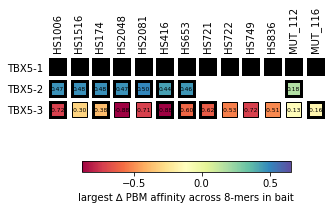

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
y1h_pdi_per_tf_gene_plot("TBX5", data=y1h, ax=ax, 
                         iso_order=["TBX5-1", "TBX5-2", "TBX5-3"], bait_colors=colors, bait_annot=annot)

plt.colorbar(m, ax=ax, orientation="horizontal", shrink=0.75, label="largest ∆ PBM affinity across 8-mers in bait")
plt.savefig('../../figures/TBX5_y1h_with_pbm.pdf', bbox_inches='tight', dpi="figure")

In [43]:
np.mean([-0.72, -0.38, -0.88, -0.60, -0.62, -0.16])

-0.56

In [44]:
np.mean([-0.36, -0.88, -0.72, -0.53, -0.72, -0.51, -0.13])

-0.5499999999999999

In [45]:
def vals_per_bait_last50(row, kfit_vs, colname, alt_suffix, ascending):
    
    kmers = []
    seq = row.seq
    seq_len = row.seq_len
    for i in range(seq_len-100, seq_len-8):
        kmer = seq[i:i+8]
        kmers.append(kmer)
        
    sub = kfit_vs[kfit_vs["seq"].isin(kmers)]
    sub["abs"] = np.abs(sub[colname])
    sub = sub.sort_values(by="abs", ascending=ascending)
    largest_kmer = sub["seq"].iloc[0]
    largest_val = sub[colname].iloc[0]
    xval = sub["affinityEstimate_ref"].iloc[0]
    yval = sub["affinityEstimate_%s" % alt_suffix].iloc[0]
    
    rgb = sub["%s_rgb" % colname].iloc[0]
    return "%s_%s_%s_%s_%s" % (largest_kmer, largest_val, xval, yval, rgb)

In [46]:
tbx5_baits["tmp_iso2_l5"] = tbx5_baits.apply(vals_per_bait_last50, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso2", alt_suffix="iso2",
                                       ascending=False)
tbx5_baits["val_kmer_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso2_l5"] = tbx5_baits["rgb_iso2_l5"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [47]:
tbx5_baits["tmp_iso3_l5"] = tbx5_baits.apply(vals_per_bait_last50, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso3", alt_suffix="iso3",
                                       ascending=False)
tbx5_baits["val_kmer_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso3_l5"] = tbx5_baits["rgb_iso3_l5"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [48]:
colors = tbx5_baits[["id_upper", "rgb_iso2_l5", "rgb_iso3_l5"]].set_index("id_upper").T
colors.index = ["TBX5-2", "TBX5-3"]
colors.loc["TBX5-1"] = [(0, 0, 0, 1)] * len(tbx5_baits)
colors = colors.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]
colors

id_upper,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
TBX5-1,"(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)"
TBX5-2,"(0.5803921568627453, 0.8313725490196079, 0.644...","(0.9991541714725106, 0.9737793156478277, 0.705...","(0.22406766628219915, 0.564552095347943, 0.728...","(0.9966935793925413, 0.8975009611687812, 0.577...","(0.5803921568627453, 0.8313725490196079, 0.644...","(0.2880430603613995, 0.6359092656670511, 0.698...","(0.24805843906189928, 0.5913110342176086, 0.71...","(0.3680123029603999, 0.7251057285659361, 0.661...","(0.3415609381007305, 0.3448673587081892, 0.651...","(0.27204921184159936, 0.6180699730872741, 0.70...","(0.43183391003460214, 0.7732410611303344, 0.64...","(0.6932718185313343, 0.8758938869665515, 0.638...","(0.7840061514802001, 0.9128027681660901, 0.620..."
TBX5-3,"(0.9665513264129182, 0.49742406766628217, 0.29...","(0.9982314494425221, 0.9451749327181853, 0.657...","(0.9933102652825836, 0.7400230680507497, 0.428...","(0.9982314494425221, 0.9451749327181853, 0.657...","(0.9971549404075356, 0.9118031526336025, 0.601...","(0.9997693194925029, 0.9928489042675894, 0.737...","(0.9873125720876587, 0.6473663975394078, 0.364...","(0.9982314494425221, 0.9451749327181853, 0.657...","(0.9665513264129182, 0.49742406766628217, 0.29...","(0.9982314494425221, 0.9451749327181853, 0.657...","(0.9965397923875433, 0.8927335640138409, 0.569...","(0.9996155324875048, 0.988081507112649, 0.7290...","(0.9988465974625145, 0.9642445213379469, 0.689..."


In [49]:
annot = tbx5_baits[["id_upper", "val_diff_iso2_l5", "val_diff_iso3_l5"]].set_index("id_upper").T
annot.index = ["TBX5-2", "TBX5-3"]
annot.loc["TBX5-1"] = ["NA"] * len(tbx5_baits)
annot = annot.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]
annot

id_upper,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
TBX5-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TBX5-2,0.244435,-0.14541,0.480628,-0.243657,0.243701,0.431963,0.460871,0.372767,0.63071,0.440782,0.327257,0.177546,0.114899
TBX5-3,-0.527621,-0.180591,-0.376065,-0.1804,-0.223823,-0.124494,-0.438951,-0.183357,-0.527621,-0.182687,-0.24777,-0.130375,-0.155962


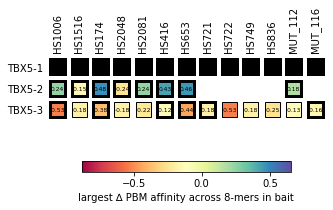

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
y1h_pdi_per_tf_gene_plot("TBX5", data=y1h, ax=ax, 
                         iso_order=["TBX5-1", "TBX5-2", "TBX5-3"], bait_colors=colors, bait_annot=annot)

plt.colorbar(m, ax=ax, orientation="horizontal", shrink=0.75, label="largest ∆ PBM affinity across 8-mers in bait")
plt.savefig('../../figures/TBX5_y1h_with_pbm_last50.pdf', bbox_inches='tight', dpi="figure")